In [34]:
import joblib
import pandas as pd

In [2]:
loaded_model = joblib.load('../train/models/regression_model.joblib')

In [33]:
import cv2
import numpy as np

def merge_images(background_path, overlay_path, output_path):
    # Load images
    background = cv2.imread(background_path)
    overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)

    # Get dimensions of the background image
    bg_height, bg_width = background.shape[:2]

    # Calculate the position to place the overlay at the center
    x_position = (bg_width - overlay.shape[1]) // 2
    y_position = (bg_height - overlay.shape[0]) // 2

    # If overlay has an alpha channel, use it; otherwise, create one
    if overlay.shape[2] == 4:
        mask = overlay[:, :, 3]
    else:
        mask = np.ones_like(overlay[:, :, 0]) * 255

    # Extract the RGB channels from the overlay image
    overlay_rgb = overlay[:, :, :3]

    # Place the overlay on the background at the calculated position
    for c in range(3):
        background[y_position:y_position + overlay.shape[0], x_position:x_position + overlay.shape[1], c] = \
            background[y_position:y_position + overlay.shape[0], x_position:x_position + overlay.shape[1], c] * \
            (1 - mask / 255.0) + overlay_rgb[:, :, c] * (mask / 255.0)

    # Save the result
    cv2.imwrite(output_path, background)

# Example usage
merge_images("ee11627c036ee9772446b6e3ac9da649/bg-after.jpg", "ee11627c036ee9772446b6e3ac9da649/advertised_item.png", "output_image.jpg")


In [3]:
import numpy as np
new_input = np.array([1,0.004989,0])
columns = ['num_of_elements', 'Size', 'encoded_column']
new_input_df = pd.DataFrame([new_input], columns=columns)
s = loaded_model.predict(new_input_df)

In [4]:
import cv2

In [21]:
# Load the original image
original_image = cv2.imread('output_image.jpg')
XMin, XMax, YMin, YMax = s[0]
# Calculate absolute pixel values
height, width, _ = original_image.shape
xmin, xmax, ymin, ymax = int(XMin * width), int(XMax * width), int(YMin * height), int(YMax * height)

# Calculate center coordinates
center_x = (xmin + xmax) // 2
center_y = (ymin + ymax) // 2

In [22]:
image_to_place = cv2.imread('../Challenge_Data/Assets/ee11627c036ee9772446b6e3ac9da649/logo.png')

# Calculate the position to place the image
start_x = center_x - image_to_place.shape[1] // 2
start_y = center_y - image_to_place.shape[0] // 2


In [23]:
original_image[start_y:start_y + image_to_place.shape[0], start_x:start_x + image_to_place.shape[1]] = image_to_place

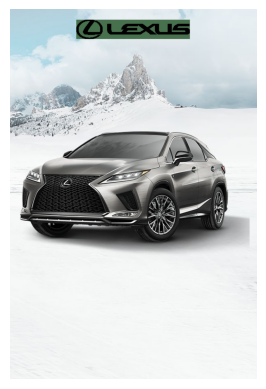

In [24]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

In [25]:
new_input = np.array([2,0.519220,3])
columns = ['num_of_elements', 'Size', 'encoded_column']
new_input_df = pd.DataFrame([new_input], columns=columns)
d = loaded_model.predict(new_input_df)

In [26]:
XMin2, XMax2, YMin2, YMax2 = d[0]

In [27]:
# Calculate absolute pixel values for the second image
xmin2, xmax2, ymin2, ymax2 = int(XMin2 * width), int(XMax2 * width), int(YMin2 * height), int(YMax2 * height)

# Calculate center coordinates for the second image
center_x2 = (xmin2 + xmax2) // 2
center_y2 = (ymin2 + ymax2) // 2

# Load the second image to be placed
image_to_place2 = cv2.imread('../Challenge_Data/Assets/ee11627c036ee9772446b6e3ac9da649/gametext_1.png')

# Calculate the position to place the second image
start_x2 = center_x2 - image_to_place2.shape[1] // 2
start_y2 = center_y2 - image_to_place2.shape[0] // 2

# Place the second image on the original image (without altering the first image)
original_image[start_y2:start_y2 + image_to_place2.shape[0], start_x2:start_x2 + image_to_place2.shape[1]] = image_to_place2

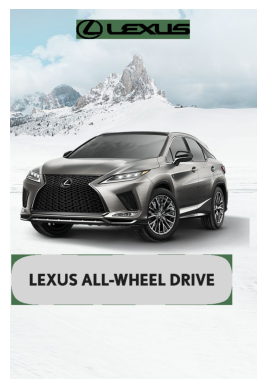

In [28]:
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()

In [29]:
new_input = np.array([3,0.819220,2])
columns = ['num_of_elements', 'Size', 'encoded_column']
new_input_df = pd.DataFrame([new_input], columns=columns)
t = loaded_model.predict(new_input_df)

In [30]:
# Calculate absolute pixel values for the third image
XMin3, XMax3, YMin3, YMax3 = t[0]
xmin3, xmax3, ymin3, ymax3 = int(XMin3 * width), int(XMax3 * width), int(YMin3 * height), int(YMax3 * height)

# Calculate center coordinates for the third image
center_x3 = (xmin3 + xmax3) // 2
center_y3 = (ymin3 + ymax3) // 2

# Load the third image to be placed
image_to_place3 = cv2.imread('../Challenge_Data/Assets/ee11627c036ee9772446b6e3ac9da649/cta.png')

In [31]:
start_x3 = center_x3 - image_to_place3.shape[1] // 2
start_y3 = center_y3 - image_to_place3.shape[0] // 2

# Place the third image on the original image (without altering the previous images)
original_image[start_y3:start_y3 + image_to_place3.shape[0], start_x3:start_x3 + image_to_place3.shape[1]] = image_to_place3

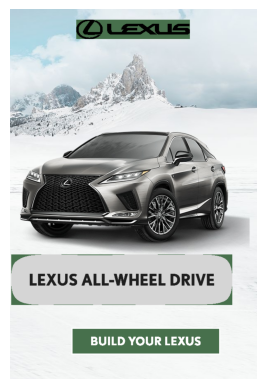

In [32]:
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()